In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "low_z"
key = "lambda"
quantile = "2"


In [3]:
shape_cat="mcal"
vol="all"
z_range="all_z"
key="lambda"
quantile="1"

In [4]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [5]:
if quantile!="":
    i=int(quantile)

In [6]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [7]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [8]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [9]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [10]:
NBINS=10

In [11]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [12]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [13]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [14]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [15]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [16]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.76it/s]

14it [00:00,  5.30it/s]

26it [00:00,  7.43it/s]

37it [00:00, 10.31it/s]

49it [00:00, 14.20it/s]

59it [00:00, 19.07it/s]

69it [00:00, 25.02it/s]

79it [00:00, 32.25it/s]

89it [00:01, 40.44it/s]

102it [00:01, 50.56it/s]

114it [00:01, 61.14it/s]

126it [00:01, 71.00it/s]

139it [00:01, 81.19it/s]

151it [00:01, 88.22it/s]

163it [00:01, 94.89it/s]

175it [00:01, 100.83it/s]

187it [00:01, 104.04it/s]

199it [00:02, 107.97it/s]

211it [00:02, 110.01it/s]

223it [00:02, 111.83it/s]

235it [00:02, 113.84it/s]

248it [00:02, 116.33it/s]

260it [00:02, 116.85it/s]

272it [00:02, 117.09it/s]

285it [00:02, 118.01it/s]

298it [00:02, 118.78it/s]

311it [00:02, 119.36it/s]

324it [00:03, 119.67it/s]

336it [00:03, 119.34it/s]

348it [00:03, 119.30it/s]

360it [00:03, 118.89it/s]

372it [00:03, 118.89it/s]

384it [00:03, 118.85it/s]

397it [00:03, 119.40it/s]

409it [00:03, 119.05it/s]

421it [00:03, 118.57it/s]

433it [00:04, 117.77it/s]

445it [00:04, 114.31it/s]

457it [00:04, 114.99it/s]

469it [00:04, 116.37it/s]

482it [00:04, 118.12it/s]

494it [00:04, 117.91it/s]

506it [00:04, 117.53it/s]

518it [00:04, 117.64it/s]

530it [00:04, 117.71it/s]

543it [00:04, 118.72it/s]

556it [00:05, 119.29it/s]

569it [00:05, 119.56it/s]

581it [00:05, 119.04it/s]

593it [00:05, 115.71it/s]

605it [00:05, 97.79it/s] 

617it [00:05, 102.63it/s]

630it [00:05, 108.04it/s]

643it [00:05, 111.40it/s]

655it [00:05, 113.33it/s]

668it [00:06, 113.11it/s]

680it [00:06, 112.85it/s]

692it [00:06, 114.89it/s]

704it [00:06, 114.60it/s]

717it [00:06, 116.52it/s]

730it [00:06, 118.11it/s]

743it [00:06, 119.72it/s]

756it [00:06, 119.33it/s]

768it [00:06, 113.92it/s]

780it [00:07, 108.57it/s]

793it [00:07, 112.32it/s]

805it [00:07, 114.32it/s]

817it [00:07, 115.89it/s]

830it [00:07, 117.59it/s]

843it [00:07, 118.92it/s]

855it [00:07, 118.67it/s]

868it [00:07, 119.30it/s]

881it [00:07, 119.80it/s]

894it [00:07, 120.32it/s]

907it [00:08, 120.01it/s]

920it [00:08, 120.09it/s]

933it [00:08, 106.39it/s]

944it [00:08, 102.56it/s]

957it [00:08, 107.49it/s]

970it [00:08, 111.08it/s]

983it [00:08, 113.97it/s]

995it [00:08, 115.38it/s]

1007it [00:09, 116.39it/s]

1019it [00:09, 116.90it/s]

1031it [00:09, 117.34it/s]

1043it [00:09, 117.88it/s]

1056it [00:09, 119.21it/s]

1068it [00:09, 119.01it/s]

1081it [00:09, 119.47it/s]

1094it [00:09, 119.57it/s]

1107it [00:09, 119.87it/s]

1119it [00:09, 119.54it/s]

1131it [00:10, 119.18it/s]

1143it [00:10, 114.34it/s]

1155it [00:10, 115.36it/s]

1167it [00:10, 116.67it/s]

1180it [00:10, 117.81it/s]

1192it [00:10, 117.69it/s]

1204it [00:10, 108.40it/s]

1216it [00:10, 110.73it/s]

1228it [00:10, 111.73it/s]

1240it [00:11, 110.99it/s]

1252it [00:11, 94.74it/s] 

1264it [00:11, 101.06it/s]

1276it [00:11, 105.91it/s]

1289it [00:11, 110.06it/s]

1302it [00:11, 113.09it/s]

1314it [00:11, 115.01it/s]

1327it [00:11, 116.32it/s]

1340it [00:11, 118.00it/s]

1352it [00:12, 107.88it/s]

1364it [00:12, 106.84it/s]

1376it [00:12, 109.05it/s]

1388it [00:12, 111.06it/s]

1400it [00:12, 109.84it/s]

1413it [00:12, 113.31it/s]

1426it [00:12, 115.57it/s]

1439it [00:12, 117.03it/s]

1451it [00:12, 103.32it/s]

1462it [00:13, 101.70it/s]

1474it [00:13, 106.33it/s]

1486it [00:13, 109.41it/s]

1498it [00:13, 111.37it/s]

1510it [00:13, 112.39it/s]

1522it [00:13, 114.38it/s]

1535it [00:13, 116.23it/s]

1547it [00:13, 115.71it/s]

1559it [00:13, 115.30it/s]

1571it [00:14, 116.31it/s]

1583it [00:14, 117.35it/s]

1595it [00:14, 117.77it/s]

1607it [00:14, 116.75it/s]

1619it [00:14, 112.11it/s]

1631it [00:14, 112.77it/s]

1643it [00:14, 110.64it/s]

1655it [00:14, 111.37it/s]

1667it [00:14, 111.70it/s]

1679it [00:14, 104.69it/s]

1691it [00:15, 106.65it/s]

1703it [00:15, 110.04it/s]

1715it [00:15, 112.44it/s]

1727it [00:15, 114.44it/s]

1739it [00:15, 113.93it/s]

1751it [00:15, 113.52it/s]

1763it [00:15, 110.82it/s]

1775it [00:15, 108.54it/s]

1787it [00:15, 110.49it/s]

1799it [00:16, 112.94it/s]

1811it [00:16, 109.76it/s]

1824it [00:16, 113.10it/s]

1836it [00:16, 114.57it/s]

1848it [00:16, 108.71it/s]

1860it [00:16, 110.76it/s]

1872it [00:16, 112.59it/s]

1884it [00:16, 112.69it/s]

1896it [00:16, 113.46it/s]

1908it [00:17, 114.63it/s]

1920it [00:17, 115.61it/s]

1932it [00:17, 115.77it/s]

1944it [00:17, 113.77it/s]

1956it [00:17, 113.79it/s]

1968it [00:17, 114.54it/s]

1980it [00:17, 99.76it/s] 

1991it [00:17, 91.46it/s]

2001it [00:17, 93.64it/s]

2012it [00:18, 96.80it/s]

2022it [00:18, 92.49it/s]

2035it [00:18, 99.62it/s]

2048it [00:18, 105.12it/s]

2060it [00:18, 108.86it/s]

2072it [00:18, 111.85it/s]

2085it [00:18, 114.57it/s]

2097it [00:18, 115.83it/s]

2110it [00:18, 117.23it/s]

2122it [00:18, 117.66it/s]

2134it [00:19, 114.92it/s]

2147it [00:19, 116.61it/s]

2159it [00:19, 116.68it/s]

2171it [00:19, 116.94it/s]

2183it [00:19, 117.37it/s]

2196it [00:19, 118.14it/s]

2208it [00:19, 118.59it/s]

2220it [00:19, 118.80it/s]

2232it [00:19, 118.20it/s]

2244it [00:20, 118.66it/s]

2256it [00:20, 110.16it/s]

2268it [00:20, 109.43it/s]

2280it [00:20, 110.60it/s]

2292it [00:20, 106.12it/s]

2304it [00:20, 106.54it/s]

2315it [00:20, 106.77it/s]

2327it [00:20, 109.82it/s]

2339it [00:20, 110.93it/s]

2351it [00:21, 112.87it/s]

2363it [00:21, 114.36it/s]

2375it [00:21, 105.96it/s]

2387it [00:21, 109.12it/s]

2399it [00:21, 111.66it/s]

2411it [00:21, 113.99it/s]

2424it [00:21, 115.71it/s]

2436it [00:21, 116.68it/s]

2449it [00:21, 117.91it/s]

2461it [00:21, 115.55it/s]

2473it [00:22, 114.17it/s]

2485it [00:22, 113.55it/s]

2497it [00:22, 111.26it/s]

2509it [00:22, 113.73it/s]

2522it [00:22, 115.94it/s]

2534it [00:22, 116.47it/s]

2547it [00:22, 117.91it/s]

2560it [00:22, 118.38it/s]

2573it [00:22, 119.10it/s]

2586it [00:23, 119.46it/s]

2599it [00:23, 119.72it/s]

2611it [00:23, 118.84it/s]

2623it [00:23, 115.23it/s]

2635it [00:23, 97.98it/s] 

2646it [00:23, 89.40it/s]

2656it [00:23, 92.21it/s]

2668it [00:23, 97.34it/s]

2680it [00:24, 101.06it/s]

2692it [00:24, 104.97it/s]

2705it [00:24, 109.38it/s]

2717it [00:24, 111.56it/s]

2729it [00:24, 112.92it/s]

2741it [00:24, 114.71it/s]

2754it [00:24, 116.57it/s]

2766it [00:24, 116.29it/s]

2778it [00:24, 95.78it/s] 

2789it [00:25, 91.18it/s]

2801it [00:25, 98.04it/s]

2813it [00:25, 103.52it/s]

2826it [00:25, 108.01it/s]

2838it [00:25, 111.34it/s]

2851it [00:25, 114.04it/s]

2863it [00:25, 114.43it/s]

2875it [00:25, 115.64it/s]

2887it [00:25, 114.70it/s]

2899it [00:25, 116.08it/s]

2911it [00:26, 115.83it/s]

2923it [00:26, 115.74it/s]

2935it [00:26, 109.52it/s]

2947it [00:26, 112.20it/s]

2959it [00:26, 112.51it/s]

2971it [00:26, 96.88it/s] 

2983it [00:26, 102.20it/s]

2996it [00:26, 106.77it/s]

3007it [00:26, 106.58it/s]

3019it [00:27, 109.48it/s]

3031it [00:27, 112.00it/s]

3043it [00:27, 113.68it/s]

3055it [00:27, 114.76it/s]

3067it [00:27, 115.59it/s]

3079it [00:27, 115.69it/s]

3091it [00:27, 103.07it/s]

3102it [00:27, 94.90it/s] 

3114it [00:27, 100.55it/s]

3126it [00:28, 105.31it/s]

3138it [00:28, 109.13it/s]

3151it [00:28, 112.26it/s]

3163it [00:28, 114.19it/s]

3175it [00:28, 115.49it/s]

3187it [00:28, 102.22it/s]

3198it [00:28, 103.90it/s]

3210it [00:28, 107.32it/s]

3221it [00:28, 100.45it/s]

3232it [00:29, 101.55it/s]

3243it [00:29, 102.89it/s]

3254it [00:29, 100.25it/s]

3265it [00:29, 99.37it/s] 

3276it [00:29, 91.21it/s]

3286it [00:29, 92.97it/s]

3298it [00:29, 99.12it/s]

3311it [00:29, 104.49it/s]

3323it [00:29, 107.52it/s]

3334it [00:30, 106.94it/s]

3345it [00:30, 106.73it/s]

3357it [00:30, 108.61it/s]

3369it [00:30, 110.27it/s]

3381it [00:30, 110.64it/s]

3393it [00:30, 100.03it/s]

3404it [00:30, 96.80it/s] 

3415it [00:30, 100.38it/s]

3426it [00:30, 102.92it/s]

3437it [00:31, 104.86it/s]

3448it [00:31, 104.10it/s]

3459it [00:31, 105.31it/s]

3470it [00:31, 97.50it/s] 

3481it [00:31, 99.58it/s]

3492it [00:31, 101.49it/s]

3503it [00:31, 92.02it/s] 

3513it [00:31, 92.05it/s]

3523it [00:31, 93.68it/s]

3536it [00:32, 100.82it/s]

3549it [00:32, 106.61it/s]

3562it [00:32, 110.61it/s]

3574it [00:32, 112.71it/s]

3586it [00:32, 114.35it/s]

3598it [00:32, 115.93it/s]

3611it [00:32, 117.29it/s]

3623it [00:32, 117.57it/s]

3635it [00:32, 107.34it/s]

3646it [00:33, 105.16it/s]

3657it [00:33, 96.51it/s] 

3668it [00:33, 99.35it/s]

3679it [00:33, 96.14it/s]

3690it [00:33, 99.66it/s]

3702it [00:33, 103.48it/s]

3713it [00:33, 104.87it/s]

3724it [00:33, 92.35it/s] 

3734it [00:34, 78.18it/s]

3743it [00:34, 70.15it/s]

3751it [00:34, 66.21it/s]

3759it [00:34, 64.78it/s]

3766it [00:34, 64.42it/s]

3773it [00:34, 62.26it/s]

3780it [00:34, 58.01it/s]

3786it [00:34, 56.85it/s]

3793it [00:35, 58.17it/s]

3799it [00:35, 58.36it/s]

3805it [00:35, 58.66it/s]

3811it [00:35, 58.94it/s]

3817it [00:35, 59.04it/s]

3824it [00:35, 59.50it/s]

3830it [00:35, 59.46it/s]

3836it [00:35, 59.07it/s]

3843it [00:35, 59.46it/s]

3850it [00:36, 59.75it/s]

3856it [00:36, 56.27it/s]

3864it [00:36, 60.68it/s]

3874it [00:36, 68.67it/s]

3884it [00:36, 75.44it/s]

3895it [00:36, 81.58it/s]

3906it [00:36, 88.33it/s]

3916it [00:36, 87.15it/s]

3928it [00:36, 94.69it/s]

3940it [00:37, 99.42it/s]

3951it [00:37, 100.23it/s]

3963it [00:37, 105.25it/s]

3975it [00:37, 108.58it/s]

3987it [00:37, 111.39it/s]

3999it [00:37, 113.09it/s]

4011it [00:37, 113.54it/s]

4023it [00:37, 115.34it/s]

4036it [00:37, 117.06it/s]

4049it [00:37, 118.27it/s]

4061it [00:38, 105.51it/s]

4072it [00:38, 95.10it/s] 

4082it [00:38, 95.23it/s]

4095it [00:38, 101.87it/s]

4108it [00:38, 107.25it/s]

4120it [00:38, 110.41it/s]

4132it [00:38, 112.37it/s]

4144it [00:38, 113.42it/s]

4156it [00:38, 114.70it/s]

4158it [00:38, 106.69it/s]


0it [00:00, ?it/s]

13it [00:00, 120.66it/s]

Number of empty sat catalogs is 2


26it [00:00, 121.58it/s]

39it [00:00, 122.65it/s]

51it [00:00, 118.17it/s]

61it [00:00, 112.03it/s]

74it [00:00, 115.11it/s]

87it [00:00, 118.36it/s]

98it [00:00, 110.18it/s]

111it [00:00, 113.81it/s]

124it [00:01, 117.04it/s]

137it [00:01, 120.59it/s]

149it [00:01, 117.69it/s]

162it [00:01, 119.18it/s]

174it [00:01, 111.61it/s]

186it [00:01, 104.45it/s]

199it [00:01, 109.54it/s]

211it [00:01, 99.10it/s] 

222it [00:02, 93.61it/s]

235it [00:02, 100.32it/s]

248it [00:02, 106.70it/s]

261it [00:02, 112.68it/s]

273it [00:02, 104.53it/s]

286it [00:02, 109.37it/s]

299it [00:02, 114.17it/s]

311it [00:02, 111.93it/s]

323it [00:02, 113.19it/s]

336it [00:02, 116.64it/s]

348it [00:03, 108.76it/s]

360it [00:03, 110.35it/s]

373it [00:03, 114.32it/s]

386it [00:03, 117.49it/s]

399it [00:03, 119.87it/s]

412it [00:03, 121.97it/s]

425it [00:03, 122.95it/s]

438it [00:03, 124.10it/s]

451it [00:03, 121.50it/s]

464it [00:04, 123.60it/s]

477it [00:04, 122.35it/s]

490it [00:04, 110.96it/s]

502it [00:04, 110.46it/s]

515it [00:04, 113.30it/s]

528it [00:04, 115.52it/s]

541it [00:04, 117.70it/s]

554it [00:04, 120.43it/s]

567it [00:04, 120.92it/s]

580it [00:05, 122.82it/s]

593it [00:05, 124.23it/s]

606it [00:05, 124.73it/s]

619it [00:05, 109.04it/s]

631it [00:05, 106.30it/s]

644it [00:05, 111.15it/s]

657it [00:05, 115.06it/s]

670it [00:05, 117.57it/s]

682it [00:05, 117.11it/s]

694it [00:06, 107.23it/s]

707it [00:06, 112.05it/s]

719it [00:06, 86.94it/s] 

732it [00:06, 95.94it/s]

745it [00:06, 103.65it/s]

758it [00:06, 109.81it/s]

770it [00:06, 112.54it/s]

783it [00:06, 116.29it/s]

796it [00:07, 118.93it/s]

809it [00:07, 116.57it/s]

822it [00:07, 119.44it/s]

836it [00:07, 122.61it/s]

849it [00:07, 123.72it/s]

862it [00:07, 121.77it/s]

875it [00:07, 120.41it/s]

888it [00:07, 122.01it/s]

901it [00:07, 109.88it/s]

913it [00:08, 108.52it/s]

926it [00:08, 112.54it/s]

939it [00:08, 116.17it/s]

951it [00:08, 105.77it/s]

965it [00:08, 111.59it/s]

978it [00:08, 116.20it/s]

990it [00:08, 99.25it/s] 

1001it [00:08, 95.16it/s]

1012it [00:08, 98.00it/s]

1025it [00:09, 104.13it/s]

1038it [00:09, 109.30it/s]

1050it [00:09, 101.77it/s]

1062it [00:09, 104.88it/s]

1075it [00:09, 110.33it/s]

1087it [00:09, 110.61it/s]

1100it [00:09, 115.37it/s]

1114it [00:09, 119.34it/s]

1127it [00:09, 107.23it/s]

1139it [00:10, 100.20it/s]

1152it [00:10, 105.49it/s]

1165it [00:10, 111.10it/s]

1179it [00:10, 116.54it/s]

1191it [00:10, 115.06it/s]

1205it [00:10, 119.72it/s]

1219it [00:10, 123.15it/s]

1233it [00:10, 125.76it/s]

1246it [00:10, 126.35it/s]

1259it [00:11, 127.10it/s]

1272it [00:11, 127.46it/s]

1285it [00:11, 123.92it/s]

1298it [00:11, 123.79it/s]

1311it [00:11, 124.75it/s]

1325it [00:11, 126.75it/s]

1339it [00:11, 127.87it/s]

1352it [00:11, 128.00it/s]

1365it [00:11, 128.59it/s]

1378it [00:12, 128.79it/s]

1392it [00:12, 125.95it/s]

1405it [00:12, 122.88it/s]

1418it [00:12, 123.78it/s]

1431it [00:12, 115.11it/s]

1443it [00:12, 114.60it/s]

1455it [00:12, 110.93it/s]

1469it [00:12, 116.08it/s]

1481it [00:12, 112.80it/s]

1494it [00:13, 115.54it/s]

1507it [00:13, 117.03it/s]

1519it [00:13, 112.95it/s]

1533it [00:13, 117.84it/s]

1546it [00:13, 119.17it/s]

1559it [00:13, 121.09it/s]

1572it [00:13, 122.09it/s]

1585it [00:13, 114.50it/s]

1597it [00:13, 104.40it/s]

1608it [00:14, 99.44it/s] 

1619it [00:14, 94.07it/s]

1631it [00:14, 99.19it/s]

1642it [00:14, 92.95it/s]

1652it [00:14, 90.39it/s]

1664it [00:14, 97.04it/s]

1677it [00:14, 103.27it/s]

1690it [00:14, 108.25it/s]

1703it [00:14, 113.69it/s]

1716it [00:15, 117.17it/s]

1729it [00:15, 118.80it/s]

1743it [00:15, 122.04it/s]

1756it [00:15, 123.59it/s]

1769it [00:15, 123.90it/s]

1782it [00:15, 124.11it/s]

1795it [00:15, 124.95it/s]

1808it [00:15, 124.73it/s]

1822it [00:15, 126.23it/s]

1835it [00:16, 118.93it/s]

1848it [00:16, 121.30it/s]

1861it [00:16, 123.04it/s]

1874it [00:16, 123.43it/s]

1887it [00:16, 120.06it/s]

1900it [00:16, 112.38it/s]

1913it [00:16, 116.15it/s]

1925it [00:16, 109.50it/s]

1937it [00:16, 110.63it/s]

1949it [00:17, 112.20it/s]

1961it [00:17, 110.26it/s]

1973it [00:17, 110.03it/s]

1985it [00:17, 111.53it/s]

1997it [00:17, 98.79it/s] 

2008it [00:17, 98.17it/s]

2021it [00:17, 105.80it/s]

2035it [00:17, 112.38it/s]

2047it [00:17, 110.90it/s]

2060it [00:18, 115.03it/s]

2073it [00:18, 118.63it/s]

2086it [00:18, 120.64it/s]

2099it [00:18, 121.72it/s]

2112it [00:18, 123.68it/s]

2125it [00:18, 105.69it/s]

2137it [00:18, 98.39it/s] 

2150it [00:18, 104.12it/s]

2162it [00:18, 108.33it/s]

2174it [00:19, 110.27it/s]

2186it [00:19, 111.62it/s]

2198it [00:19, 112.44it/s]

2210it [00:19, 114.23it/s]

2222it [00:19, 112.55it/s]

2235it [00:19, 116.83it/s]

2248it [00:19, 119.52it/s]

2262it [00:19, 122.38it/s]

2275it [00:19, 124.36it/s]

2288it [00:20, 125.22it/s]

2301it [00:20, 122.92it/s]

2314it [00:20, 120.68it/s]

2327it [00:20, 122.34it/s]

2340it [00:20, 118.05it/s]

2353it [00:20, 120.42it/s]

2366it [00:20, 123.05it/s]

2379it [00:20, 108.75it/s]

2391it [00:20, 100.66it/s]

2402it [00:21, 97.81it/s] 

2415it [00:21, 105.47it/s]

2428it [00:21, 109.75it/s]

2441it [00:21, 114.94it/s]

2455it [00:21, 119.47it/s]

2468it [00:21, 122.23it/s]

2481it [00:21, 124.42it/s]

2495it [00:21, 125.85it/s]

2508it [00:21, 114.80it/s]

2521it [00:22, 117.41it/s]

2533it [00:22, 103.62it/s]

2545it [00:22, 106.36it/s]

2557it [00:22, 108.51it/s]

2570it [00:22, 113.73it/s]

2583it [00:22, 115.14it/s]

2595it [00:22, 115.86it/s]

2608it [00:22, 119.28it/s]

2621it [00:22, 117.44it/s]

2634it [00:23, 120.39it/s]

2647it [00:23, 121.72it/s]

2660it [00:23, 122.78it/s]

2673it [00:23, 123.43it/s]

2686it [00:23, 109.02it/s]

2698it [00:23, 98.41it/s] 

2709it [00:23, 94.88it/s]

2719it [00:23, 92.43it/s]

2732it [00:23, 100.47it/s]

2745it [00:24, 107.32it/s]

2758it [00:24, 112.03it/s]

2771it [00:24, 115.79it/s]

2785it [00:24, 120.04it/s]

2798it [00:24, 121.82it/s]

2812it [00:24, 124.65it/s]

2825it [00:24, 125.95it/s]

2838it [00:24, 126.56it/s]

2851it [00:24, 127.44it/s]

2864it [00:25, 126.81it/s]

2877it [00:25, 124.47it/s]

2890it [00:25, 122.97it/s]

2903it [00:25, 97.37it/s] 

2914it [00:25, 99.91it/s]

2926it [00:25, 103.28it/s]

2937it [00:25, 103.34it/s]

2950it [00:25, 109.06it/s]

2962it [00:25, 109.53it/s]

2975it [00:26, 113.56it/s]

2987it [00:26, 98.18it/s] 

2998it [00:26, 95.73it/s]

3011it [00:26, 103.80it/s]

3024it [00:26, 109.85it/s]

3037it [00:26, 114.10it/s]

3050it [00:26, 118.12it/s]

3064it [00:26, 121.80it/s]

3077it [00:26, 123.67it/s]

3091it [00:27, 125.43it/s]

3104it [00:27, 124.83it/s]

3117it [00:27, 123.97it/s]

3130it [00:27, 117.83it/s]

3142it [00:27, 104.22it/s]

3153it [00:27, 103.95it/s]

3165it [00:27, 108.15it/s]

3178it [00:27, 113.57it/s]

3191it [00:27, 116.44it/s]

3203it [00:28, 88.78it/s] 

3213it [00:28, 76.04it/s]

3222it [00:28, 65.15it/s]

3230it [00:28, 62.05it/s]

3237it [00:28, 61.77it/s]

3244it [00:28, 61.12it/s]

3251it [00:29, 57.56it/s]

3258it [00:29, 59.45it/s]

3265it [00:29, 59.97it/s]

3272it [00:29, 59.50it/s]

3283it [00:29, 68.53it/s]

3294it [00:29, 75.14it/s]

3303it [00:29, 70.73it/s]

3311it [00:29, 67.18it/s]

3319it [00:30, 66.00it/s]

3326it [00:30, 66.45it/s]

3333it [00:30, 64.09it/s]

3340it [00:30, 61.51it/s]

3347it [00:30, 60.53it/s]

3354it [00:30, 61.85it/s]

3361it [00:30, 62.90it/s]

3370it [00:30, 68.08it/s]

3381it [00:30, 76.36it/s]

3393it [00:30, 85.52it/s]

3403it [00:31, 85.80it/s]

3413it [00:31, 75.64it/s]

3422it [00:31, 77.54it/s]

3434it [00:31, 86.61it/s]

3448it [00:31, 96.26it/s]

3462it [00:31, 104.61it/s]

3475it [00:31, 110.79it/s]

3489it [00:31, 116.69it/s]

3502it [00:32, 119.61it/s]

3515it [00:32, 121.98it/s]

3528it [00:32, 122.50it/s]

3541it [00:32, 122.56it/s]

3554it [00:32, 120.01it/s]

3567it [00:32, 122.66it/s]

3581it [00:32, 125.18it/s]

3594it [00:32, 122.53it/s]

3608it [00:32, 125.24it/s]

3621it [00:32, 126.63it/s]

3635it [00:33, 128.01it/s]

3648it [00:33, 128.43it/s]

3661it [00:33, 128.88it/s]

3675it [00:33, 129.27it/s]

3688it [00:33, 128.94it/s]

3701it [00:33, 129.08it/s]

3714it [00:33, 122.92it/s]

3727it [00:33, 118.17it/s]

3739it [00:33, 103.66it/s]

3750it [00:34, 99.23it/s] 

3762it [00:34, 104.22it/s]

3773it [00:34, 103.39it/s]

3784it [00:34, 103.89it/s]

3796it [00:34, 107.53it/s]

3807it [00:34, 107.19it/s]

3820it [00:34, 112.95it/s]

3833it [00:34, 117.21it/s]

3846it [00:34, 120.28it/s]

3860it [00:35, 123.47it/s]

3873it [00:35, 124.52it/s]

3886it [00:35, 124.84it/s]

3899it [00:35, 126.05it/s]

3912it [00:35, 123.09it/s]

3925it [00:35, 123.87it/s]

3938it [00:35, 122.66it/s]

3951it [00:35, 123.32it/s]

3964it [00:35, 124.87it/s]

3977it [00:35, 124.19it/s]

3990it [00:36, 125.11it/s]

4004it [00:36, 127.02it/s]

4017it [00:36, 127.28it/s]

4030it [00:36, 127.26it/s]

4043it [00:36, 125.26it/s]

4056it [00:36, 99.19it/s] 

4068it [00:36, 104.36it/s]

4080it [00:36, 108.44it/s]

4092it [00:36, 110.76it/s]

4104it [00:37, 112.74it/s]

4116it [00:37, 114.02it/s]

4128it [00:37, 115.10it/s]

4140it [00:37, 114.25it/s]

4153it [00:37, 116.93it/s]

4158it [00:37, 110.75it/s]

Number of empty sat catalogs is 2


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [18]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [20]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [21]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [22]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [23]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [24]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [25]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

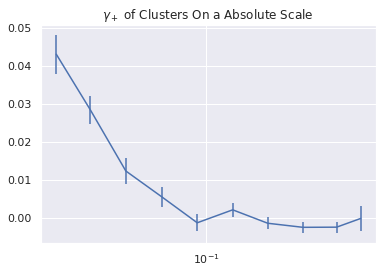

Aggregated xi:
[-21.7531 -30.1585 -19.9945 -14.8264   5.5317 -14.7462  14.2525  32.3391
  28.4561   0.2693]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2184.938   -4104.5337  -5482.1475  -7775.8824 -10446.6981 -13459.7294
 -14821.425  -12922.3774  -6241.5773   -377.9867]
------------------------------------------------------------------------------
Aggregated npairs:
[  505.  1062.  1619.  2683.  4317.  6937. 10112. 13052. 11666.  1806.]
------------------------------------------------------------------------------
Mean xi:
[-0.0431 -0.0284 -0.0123 -0.0055  0.0013 -0.0021  0.0014  0.0025  0.0024
  0.0001]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3266 -3.8649 -3.3861 -2.8982 -2.4199 -1.9403 -1.4657 -0.9901 -0.535
 -0.2093]
------------------------------------------------------------------------------


In [26]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

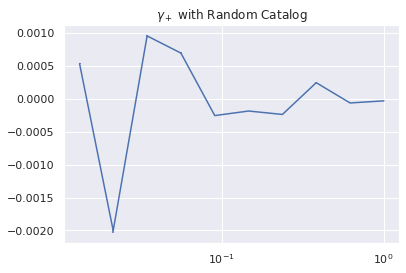

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3444e-06  3.1065e-05 -1.4866e-05 -1.0818e-05  3.9331e-06  2.8546e-06
  3.6659e-06 -3.8315e-06  9.5137e-07  4.5652e-07]


In [27]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

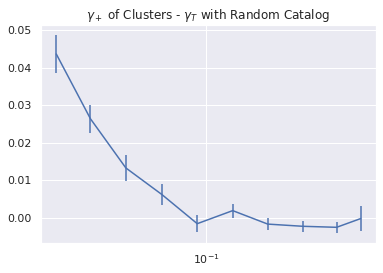

In [28]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

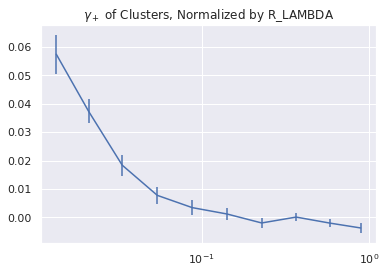

Aggregated xi:
[-14.6488 -27.5392 -23.4326 -15.2592 -11.2576  -6.4217  15.9906  -1.4087
  26.6903  30.4809]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1096.0165  -2840.6128  -4321.8326  -5717.7893  -7927.4485 -10300.2628
 -12124.0768 -11383.7815  -7131.4875   -954.4097]
------------------------------------------------------------------------------
Aggregated npairs:
[  255.   737.  1274.  1965.  3262.  5272.  8214. 11352. 13294.  8221.]
------------------------------------------------------------------------------
Mean xi:
[-0.0574 -0.0374 -0.0184 -0.0078 -0.0035 -0.0012  0.0019 -0.0001  0.002
  0.0037]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2981 -3.8543 -3.3923 -2.9098 -2.4302 -1.9538 -1.476  -1.0028 -0.5364
 -0.1161]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [29]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)